https://towardsdatascience.com/a-simple-example-of-pipeline-in-machine-learning-with-scikit-learn-e726ffbb6976

**Pipeline**

Sequentially apply a list of transforms and a final estimator. Intermediate steps of pipeline must implement fit and transform methods and the final estimator only needs to implement fit.

#### Load data

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
df = pd.read_csv(r"https://raw.githubusercontent.com/MarcoCalbucci/DataAnalytics/main/PredictiveModeling/DataPreprocessing/Data/winequality.csv")

In [36]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#### Explore data

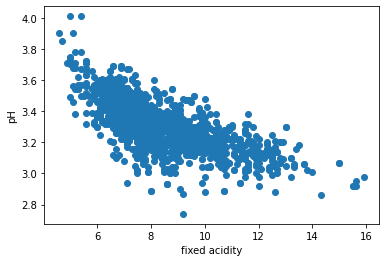

In [37]:
# check correlation between features
plt.scatter(df['fixed acidity'], df['pH'] )
plt.xlabel('fixed acidity')
plt.ylabel('pH');

In [38]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


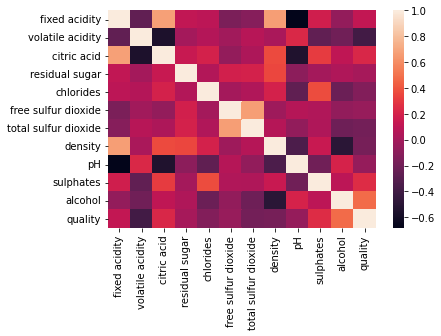

In [39]:
import seaborn as sns
sns.heatmap(df.corr());

#### Create train and test set

In [40]:
# check if the labels are unbalanced
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [41]:
X = df.drop(['quality'], axis=1)
y = df['quality']

In [42]:
# It’s necessary to use stratify as the labels are imbalanced as most of the wine quality falls in the range 5,6.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30, stratify=y)
"""
The stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.
For example, if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split has 25% of 0's and 75% of 1's.
"""

"\nThe stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.\nFor example, if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split has 25% of 0's and 75% of 1's.\n"

#### Scaling features

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Train SVC model

In [44]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train_scaled, y_train)

SVC()

In [45]:
clf.score(X_test_scaled, y_test)

0.646875

#### **Create the pipeline**

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

steps = [('scaler', StandardScaler()), ('SVM', SVC())]

from sklearn.pipeline import Pipeline
pipe = Pipeline(steps) # define the pipeline object.


In [47]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('SVM', SVC())])

In [48]:
pipe.score(X_test, y_test)

0.646875

#### Pipeline with GridSearchCV

In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [50]:
steps = [('scaler', StandardScaler()), ('SVM', SVC())]
pipe = Pipeline(steps)

In [51]:
parameteres = {'SVM__C':[0.001,0.1,10,100], 'SVM__gamma':[0.1, 0.01]}
grid = GridSearchCV(pipe, param_grid=parameteres, cv=5)

In [52]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('SVM', SVC())]),
             param_grid={'SVM__C': [0.001, 0.1, 10, 100],
                         'SVM__gamma': [0.1, 0.01]})

In [53]:
print("score = %3.2f" %(grid.score(X_test,y_test)))
print(grid.best_params_)

score = 0.67
{'SVM__C': 10, 'SVM__gamma': 0.1}


#### Why pipeline when using grid search

The pipeline object in the example above was created with StandardScaler and SVM . Instead of using pipeline if they were applied separately then for StandardScaler one can proceed as below

In [54]:
parameteres = {'C':[0.001,0.1,10,100], 'gamma':[0.1, 0.01]}

In [55]:
scale = StandardScaler().fit(X_train)
X_train_scaled = scale.transform(X_train)
grid = GridSearchCV(SVC(), param_grid=parameteres, cv=5)
grid.fit(X_train_scaled, y_train)


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.1, 10, 100], 'gamma': [0.1, 0.01]})

In [56]:
print("score = %3.2f" %(grid.score(X_test,y_test)))

score = 0.42


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [57]:
print(grid.best_params_)

{'C': 10, 'gamma': 0.1}


Here we see the intrinsic problem of applying a transformer and an estimator separately where the parameters for estimator (SVM) are determined using GridSearchCV . The scaled features used for cross-validation is separated into test and train fold but the test fold within grid-search already contains the info about training set, as the whole training set (X_train) was used for standardization. In a simpler note when SVC.fit() is done using cross-validation, the features already include info from the test-fold as StandardScaler.fit() was done on the whole training set.